In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Users/dimitristroulis/Google Drive/Python/ml-zoomcamp/01_intro/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### Preparing the dataset

In [9]:
# Normalizing the names of the columns
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [16]:
# Reassigning the df dataframe to only include the columns 'ram', 'storage', 'screen', 'final_price'
df = df[['ram', 'storage', 'screen', 'final_price']]

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='final_price', ylabel='Count'>

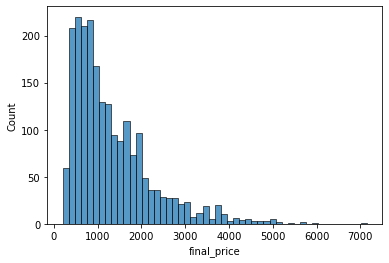

In [18]:
# Checking if the final_price variable has a long tail
sns.histplot(df.final_price, bins=50)

##### The final_price variable has a long tail to the right

### Question 1 - There's one column with missing values. What is it?

In [25]:
# Finding the column with the missing values
column_with_nulls = df.isnull().sum()
column_with_nulls = column_with_nulls[column_with_nulls > 0].index[0]
print(f"The column with null values is the '{column_with_nulls}'")

The column with null values is the 'screen'


### Question 2 - What's the median (50% percentile) for variable 'ram'?



In [27]:
# Calculating the median of the 'ram' column
median_ram = df['ram'].median()
print(f"The median of the 'ram' column is: {median_ram}")


The median of the 'ram' column is: 16.0


### Preparing and splitting the dataset


In [33]:
# Looking what the length of the total dataset is
n = int(len(df))

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
total = n_val + n_test + n_train

n, n_val, n_test, n_train, total

(2160, 432, 432, 1296, 2160)

In [44]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx[n_train:]
df.iloc[idx[:10]]

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00
1780,16,1000,15.6,1183.68
1672,16,500,14.0,1123.00
1717,8,512,15.6,423.58
926,32,512,16.0,2866.16
2157,32,1000,17.3,3399.99


In [78]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

len(df_train), len(df_test), len(df_val)

(1296, 432, 432)

In [79]:
df_train = df_train.reset_index(drop=True)
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [80]:
df_val = df_val.reset_index(drop=True)
df_val

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99
...,...,...,...,...
427,8,128,13.0,1049.00
428,8,256,13.3,799.00
429,8,512,14.0,565.54
430,16,512,14.0,738.00


In [81]:
df_test = df_test.reset_index(drop=True)
df_test

,ram,storage,screen,final_price
0,32,1000,15.6,4805.65
1,16,512,13.0,2189.00
2,16,512,15.6,1349.00
3,16,512,15.0,2175.83
4,16,1000,15.6,1248.59
...,...,...,...,...
427,8,512,15.0,1838.29
428,8,256,15.6,531.80
429,8,256,13.3,765.33
430,8,512,14.0,803.61


In [82]:
y_train = np.log1p(df_train.final_price.values)
y_val  = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [83]:
# df_train = df_train.drop('final_price', axis=1)
# df_val = df_val.drop('final_price', axis=1)
# df_test = df_test.drop('final_price', axis=1)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [57]:
df_val

,ram,storage,screen,final_price
0,32,1000,16.0,2599.00
1,16,512,15.6,999.00
2,12,512,15.6,477.28
3,8,256,13.6,1519.00
4,8,512,15.6,402.99
...,...,...,...,...
427,8,128,13.0,1049.00
428,8,256,13.3,799.00
429,8,512,14.0,565.54
430,16,512,14.0,738.00


In [58]:
y_train

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])